In [2]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans

In [6]:
# read in csv
# spotify_csv = '/Users/chelseavalencia/Desktop/general_assembly/lessons/final_project/spotify_dataset.csv'
spotify_csv = '/Users/chelseavalencia/Documents/general_assembly/spotify_dataset.csv'
spotify = pd.read_csv(spotify_csv)

spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
# understand dataset better

# get first five rows of spotify dataset
spotify.head()

# get the datatypes of the columns
spotify.dtypes

# get the index
spotify.index

# get column name
spotify.columns

# get dataset shape
spotify.shape

# get underlying numpy array
spotify.values

# concise summary
spotify.info()

# describe columns
spotify.describe(include=['object'])

# get unique track_genre
spotify.track_genre.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [10]:
# identify and fill in null values
spotify.isnull().sum()
spotify.artists.fillna('',inplace=True)

In [11]:
# lambda function for artist name
spotify['main_artist'] = spotify.artists.apply(lambda x: x.split(";")[0])

/var/folders/j_/sn39z9vs6t7_bdbkm_zcrgbw0000gq/T/ipykernel_39001/3998320509.py:5: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  average.plot(kind='bar', subplots=True, ax=axes, sharex=True, label='test')


array([<AxesSubplot:title={'center':'popularity'}, xlabel='track_genre_main'>,
       <AxesSubplot:title={'center':'duration_ms'}, xlabel='track_genre_main'>,
       <AxesSubplot:title={'center':'explicit'}, xlabel='track_genre_main'>,
       <AxesSubplot:title={'center':'danceability'}, xlabel='track_genre_main'>,
       <AxesSubplot:title={'center':'energy'}, xlabel='track_genre_main'>,
       <AxesSubplot:title={'center':'key'}, xlabel='track_genre_main'>,
       <AxesSubplot:title={'center':'loudness'}, xlabel='track_genre_main'>,
       <AxesSubplot:title={'center':'mode'}, xlabel='track_genre_main'>,
       <AxesSubplot:title={'center':'speechiness'}, xlabel='track_genre_main'>,
       <AxesSubplot:title={'center':'acousticness'}, xlabel='track_genre_main'>,
       <AxesSubplot:title={'center':'instrumentalness'}, xlabel='track_genre_main'>,
       <AxesSubplot:title={'center':'liveness'}, xlabel='track_genre_main'>,
       <AxesSubplot:title={'center':'valence'}, xlabel='track_g

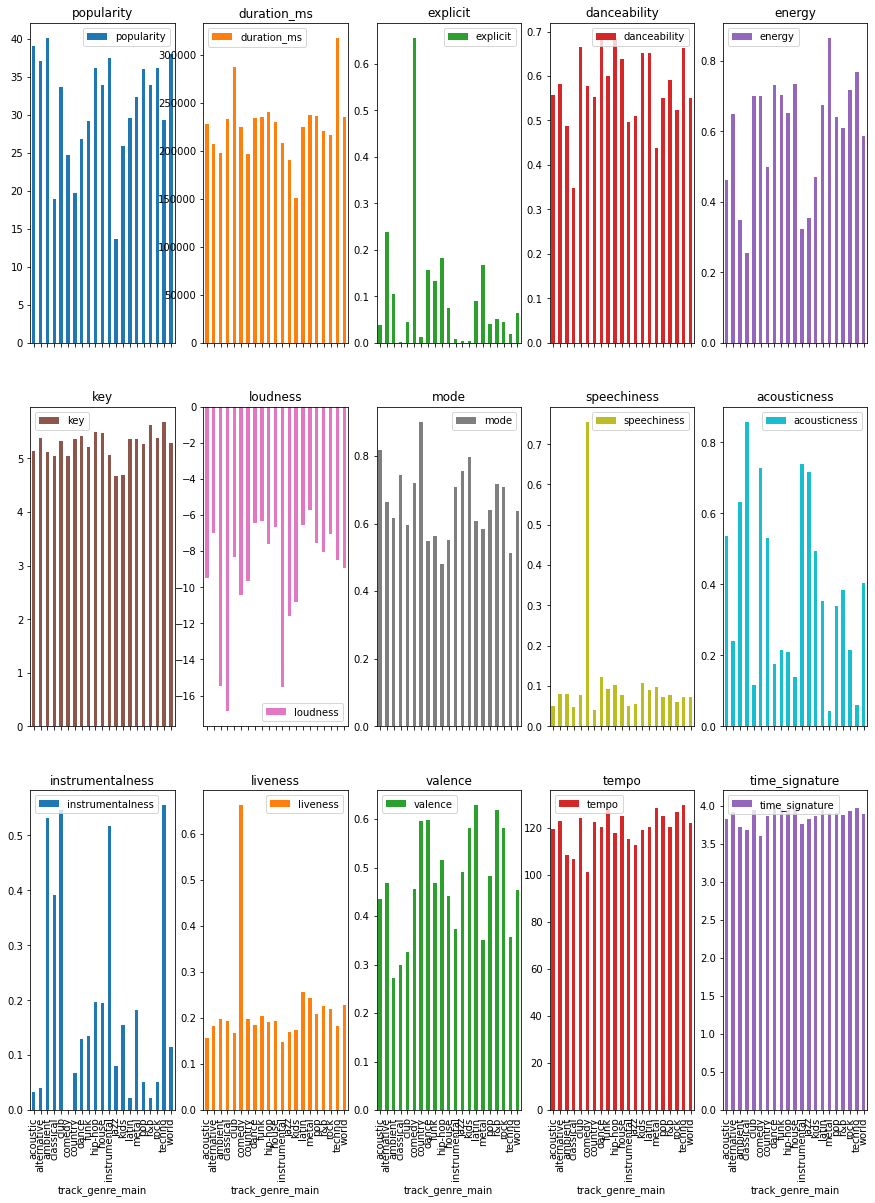

In [12]:
average = spotify.groupby('track_genre_main')[['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']].mean()

fig, axes = plt.subplots(nrows=3, ncols=5,figsize=(15, 20))
average.plot(kind='bar', subplots=True, ax=axes, sharex=True, label='test')

/var/folders/j_/sn39z9vs6t7_bdbkm_zcrgbw0000gq/T/ipykernel_39001/1305335810.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  average.plot(kind='bar', subplots=True, ax=axes, sharex=True, xlabel = 'track genre main', ylabel='average')


array([<AxesSubplot:title={'center':'explicit'}, xlabel='track genre main', ylabel='average'>,
       <AxesSubplot:title={'center':'speechiness'}, xlabel='track genre main', ylabel='average'>,
       <AxesSubplot:title={'center':'instrumentalness'}, xlabel='track genre main', ylabel='average'>,
       <AxesSubplot:title={'center':'liveness'}, xlabel='track genre main', ylabel='average'>],
      dtype=object)

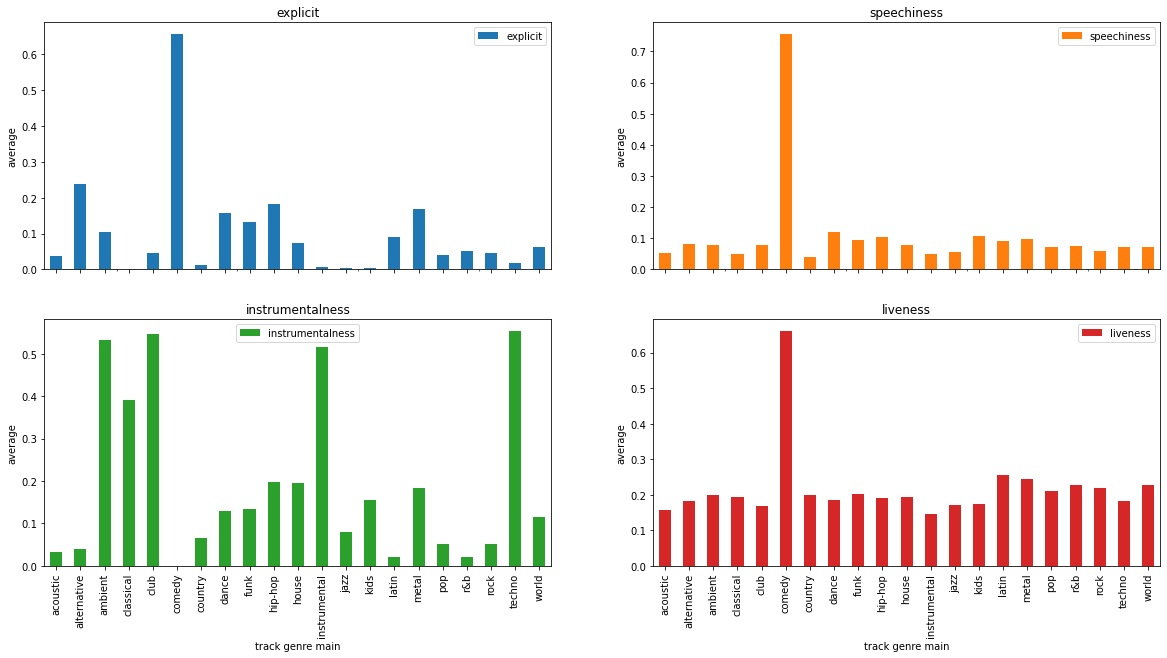

In [13]:
average = spotify.groupby('track_genre_main')[['explicit', 'speechiness','instrumentalness', 'liveness']].mean()

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20, 10))
average.plot(kind='bar', subplots=True, ax=axes, sharex=True, xlabel = 'track genre main', ylabel='average')

In [445]:
# new feature building 
# spotify['happiness'] = spotify.danceability * spotify.valence

# spotify['energetic'] = spotify.energy * spotify.loudness

# spotify['low_energy'] = spotify.energy * spotify.acousticness

# spotify['wordy'] = spotify.speechiness * spotify.liveness

# spotify['valence_bucket'] = pd.cut(spotify.valence, 4, labels=[1,2,3,4])

# spotify['instrumental_bucket'] = pd.cut(spotify.instrumentalness, 4, labels=[1,2,3,4])

# spotify['explicit_live'] = (spotify.explicit ^ 2) * spotify.speechiness * spotify.liveness

# spotify['speech_bucket'] = pd.cut(spotify.speechiness, 4, labels=[1,2,3,4])

# spotify['live_bucket'] = pd.cut(spotify.liveness, 4, labels=[1,2,3,4])

# spotify.drop(['happiness', 'energetic', 'low_energy', 'wordy', 'valence_bucket', 'instrumental_bucket', 'explicit_live', 'speech_bucket', 'live_bucket'], axis=1, inplace=True)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_main,main_artist
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,acoustic,Gen Hoshino
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,acoustic,Ben Woodward
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,acoustic,Ingrid Michaelson
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,acoustic,Kina Grannis
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,acoustic,Chord Overstreet


<AxesSubplot:>

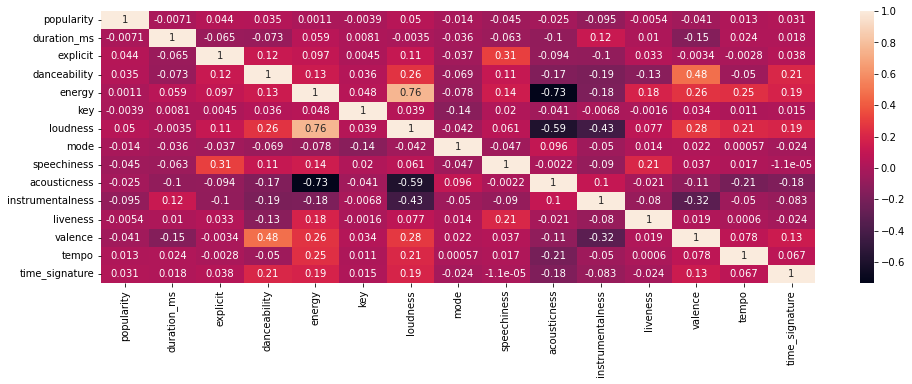

In [226]:
# create correlation heatmap
corr = spotify[['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']].corr()
plt.figure(figsize=(16,5)) 
sns.heatmap(corr, annot=True)

In [14]:
# feature selection
# features = ['duration_ms', 'explicit','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
features = ['danceability','loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo']

In [15]:
# Create x and y variables
X = spotify[features]
y = spotify.track_genre_main
# y = spotify.track_genre_main

In [38]:
# null accuracy of track_genre
y_test.value_counts()[0] / len(y_test)

0.13021052631578947

In [19]:
# k-nearest neighbors model

# instantiate knn model
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')

# create train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

# fit the model
knn.fit(X_train, y_train)

# predict results
predictions = knn.predict(X_test)

# get accuracy score
metrics.accuracy_score(y_test, predictions)

0.33887719298245617

In [25]:
# decision tree model

# instantiate model
treeclass = DecisionTreeClassifier(max_depth=3,random_state=42)

# fit the model
treeclass.fit(X_train, y_train)

# predict results
predictions = treeclass.predict(X_test)

# score results
metrics.accuracy_score(y_test, predictions)

0.2288421052631579

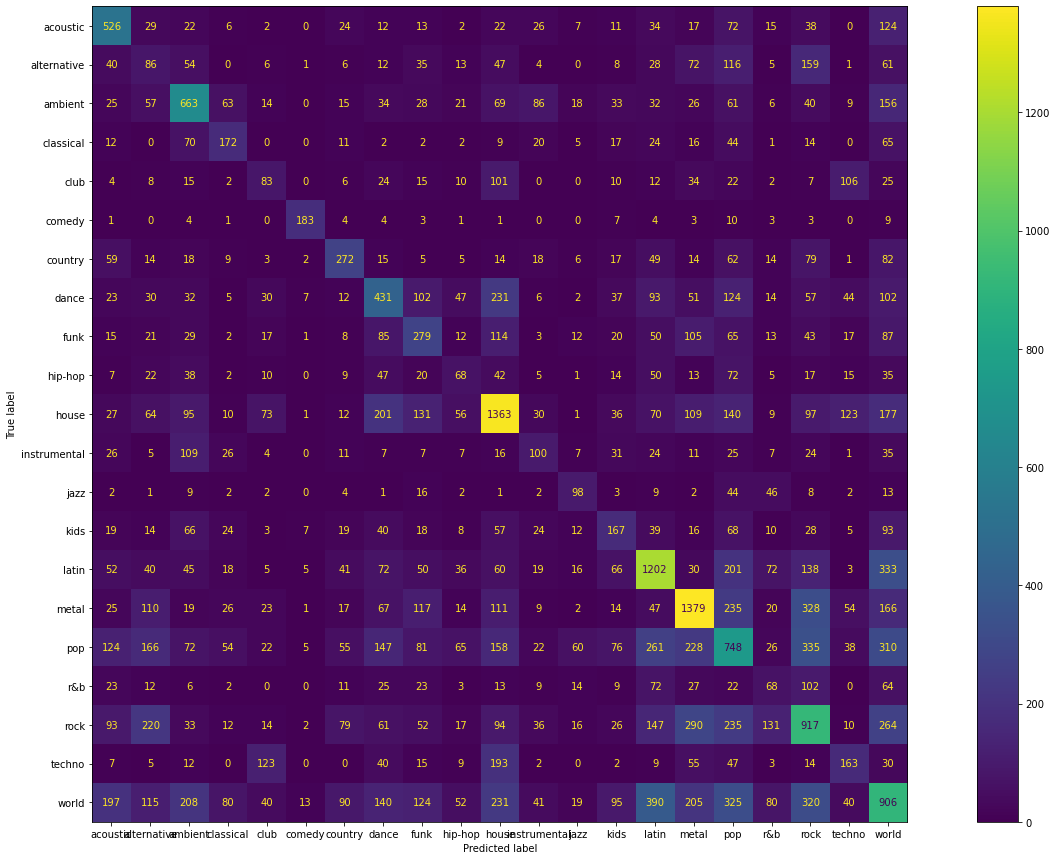

In [476]:
fig, ax = plt.subplots(figsize=(25, 15))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax)

In [447]:
tree_imp = pd.DataFrame({'feature':features, 'importance':treeclass.feature_importances_})
tree_imp

,feature,importance
0,danceability,0.135746
1,loudness,0.118900
2,speechiness,0.125129
3,acousticness,0.151456
4,instrumentalness,0.090626
5,liveness,0.103119
6,valence,0.123819
7,tempo,0.138600
8,speech_bucket,0.002029
9,live_bucket,0.010576


In [187]:
# decision tree model with bagging 

# try bagging for decision tree
bagclass = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, bootstrap=True, random_state=42)

# fit bagging model
bagclass.fit(X_train, y_train)

# get predictions
y_pred = bagclass.predict(X_test)

# get accuracy score
metrics.accuracy_score(y_test,predictions)

0.15849122807017543

In [338]:
# # random forest classifier model

# # instantiate the model
# randomclass = RandomForestClassifier(random_state=42)

# # fit the model
# randomclass.fit(X_train, y_train)

# # predict
# random_pred = randomclass.predict(X_test)

# # get accuracy score
# metrics.accuracy_score(y_test,predictions)

0.3464561403508772

In [245]:
# # logistic regression model 

# # instantiate the model
# logreg = LogisticRegression(max_iter=500)

# # fit the model
# logreg.fit(X_train, y_train)

# # get predictions
# log_predictions = logreg.predict(X_test)

/Users/chelseavalencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# create clusters for narrowing genres
# will not be using this in final output

#instantiate model
km = KMeans(n_clusters = 40, random_state=42)
km.fit(X)

#add column to dataframe
spotify['cluster'] = km.labels_

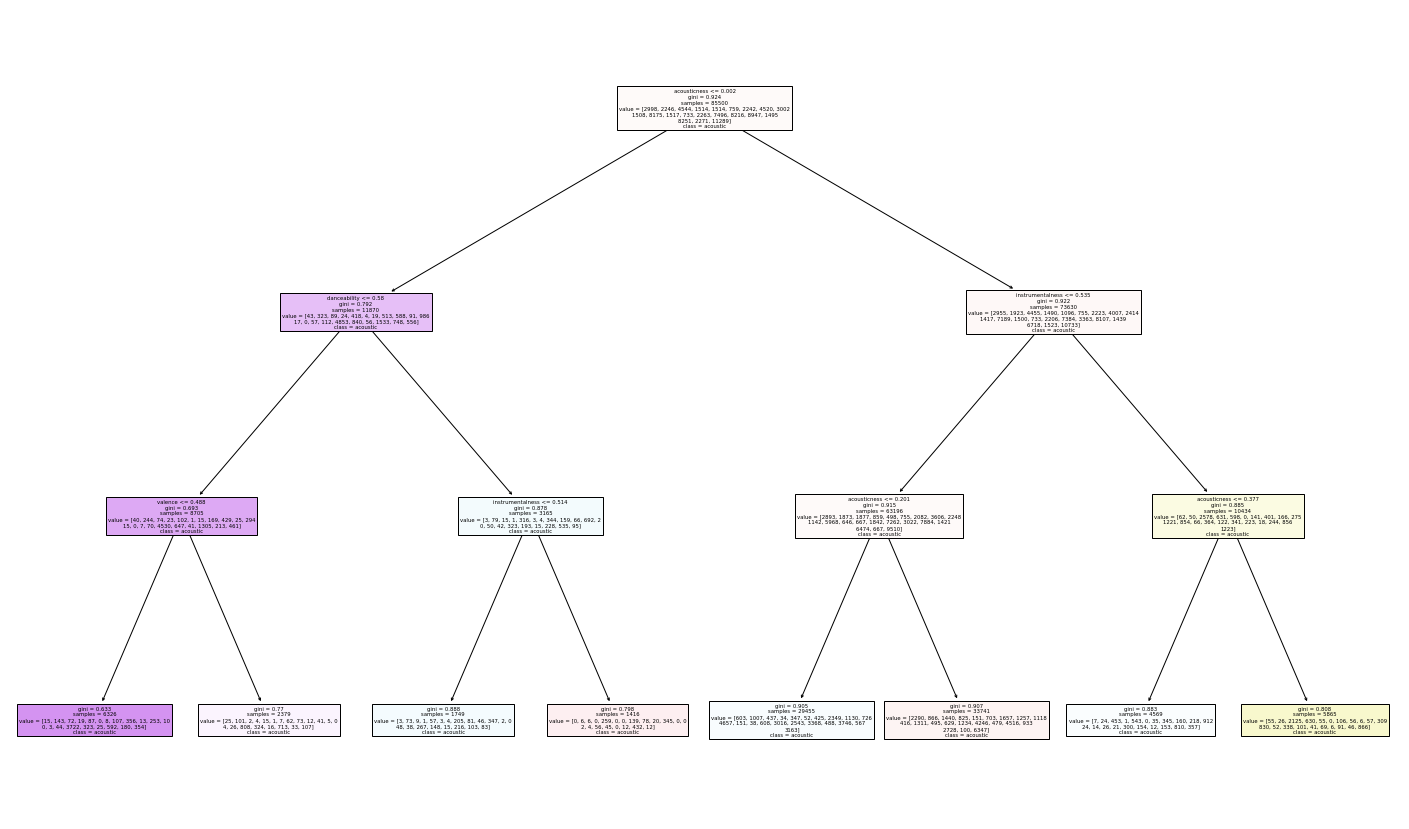

In [35]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(treeclass, 
                   feature_names=features,  
                   class_names=spotify.track_genre_main,
                   filled=True)